In [1]:
#Importing Relevant Packages
##G1 - List the packages or libraries you have chosen for Python or R and justify how each item on the list supports the analysis.
import pandas as pd #For Dataframes
import numpy as np #For general functionality
from IPython.display import display #To format outputs
import matplotlib.pyplot as plt #Used for Data Visualizations
import statsmodels.api as sm #Used to create the Linear Regression Model
from sklearn.model_selection import train_test_split #Used to split the datasets
from sklearn.decomposition import PCA #To perform Principal Component Analysis
from sklearn.preprocessing import StandardScaler #To scale the dataset
from sklearn.metrics import mean_squared_error #For calculating MSE

In [2]:
''' Part 1: Importing file and cleaning the dataset '''

#Loading the dataset and making a copy to retain original dataset separately
file_path = 'C:/Users/bconn/OneDrive/Documents/WGUCoursework/7 - D600 - Statistical Data Mining/housing_information_dataset.csv'
data = pd.read_csv(file_path)
df = data.copy() #Creating a copy to preserve the original dataframe

In [3]:
#Performing some initial profiling for reference
df

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,255614.8992,566.62,1.000000,4,779.42,20.56,5.62,39.46,10.08,...,4.93,4.44,4.55,Yes,Blue,No,1,13,181861.54230,0
1,5009,155586.0947,1472.34,1.000000,2,656.13,15.62,5.63,40.51,7.89,...,4.08,5.56,6.83,No,Green,No,1,17,50042.59757,0
2,4450,131050.8324,550.00,1.779354,3,754.57,12.47,9.20,48.38,23.74,...,4.26,8.07,8.48,Yes,Green,Yes,2,34,48400.34440,0
3,1070,151361.7125,941.81,2.035254,2,439.59,22.22,7.08,94.67,5.22,...,4.45,5.00,6.27,Yes,Red,No,1,14,84594.12145,0
4,400,113167.6128,550.00,1.064644,3,353.03,8.28,5.93,16.80,43.13,...,3.36,5.46,6.99,No,White,Yes,1,21,22934.59654,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6987,307821.1758,550.00,2.111022,4,892.35,11.89,7.97,28.18,19.23,...,4.76,3.81,6.87,No,White,Yes,1,18,241131.63070,1
6996,6995,421368.8869,1726.12,4.056115,2,943.19,34.06,5.82,90.45,17.60,...,5.31,9.84,10.00,No,White,Yes,1,18,481604.80730,1
6997,6996,473382.5348,1026.36,2.077177,5,149.31,0.10,8.81,31.79,11.59,...,4.98,7.47,2.96,No,Green,No,1,13,380555.49390,1
6998,6998,343397.9756,2218.22,1.000000,4,526.81,11.18,9.20,15.21,3.96,...,4.68,7.66,6.12,No,Blue,Yes,1,10,442610.31710,0


In [4]:
df.info()
## No null values noted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7000 non-null   int64  
 1   Price                 7000 non-null   float64
 2   SquareFootage         7000 non-null   float64
 3   NumBathrooms          7000 non-null   float64
 4   NumBedrooms           7000 non-null   int64  
 5   BackyardSpace         7000 non-null   float64
 6   CrimeRate             7000 non-null   float64
 7   SchoolRating          7000 non-null   float64
 8   AgeOfHome             7000 non-null   float64
 9   DistanceToCityCenter  7000 non-null   float64
 10  EmploymentRate        7000 non-null   float64
 11  PropertyTaxRate       7000 non-null   float64
 12  RenovationQuality     7000 non-null   float64
 13  LocalAmenities        7000 non-null   float64
 14  TransportAccess       7000 non-null   float64
 15  Fireplace            

In [5]:
##All data cleaning steps
#Renaming headers to python conventions
python_headers = ['id', 'price', 'square_footage', 'num_bathrooms', 'num_bedrooms', 'backyard_space', 'crime_rate', 'school_rating', 'age_of_home', 'distance_to_city_center', 'employment_rate', 'property_tax_rate', 'renovation_quality', 'local_amenities', 'transport_access', 'fireplace', 'house_color', 'garage', 'floors', 'windows', 'previous_sale_price', 'is_luxury']
df.columns = python_headers
#Rounding price and previous_sale_price to the nearest dollar and saving as int64
df['price'] = df['price'].round(1).astype('int64')
df['previous_sale_price'] = df['previous_sale_price'].round(1).astype('int64')
#Rounding bathroom to nearest half
def round_to_half(x):
    return round(x *2) / 2
df['num_bathrooms'] = [round_to_half(x) for x in df['num_bathrooms']]
#Changing the negative values for windows and previous_sale_price to their positive values, as negative values are impossible
df['windows'] = df['windows'].abs()
df['previous_sale_price'] = df['previous_sale_price'].abs()
#Remapping all Yes/No values to 1 and 0
bool_map = {"Yes" : 1, "No" : 0}
df['fireplace'] = df['fireplace'].map(bool_map).fillna(df['fireplace'])
df['garage'] = df['garage'].map(bool_map).fillna(df['garage'])

In [6]:
#Confirming data cleaning steps worked
df.info()
## Header format confirmed,fireplace and garage are now boolean values and saved as 1 and 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7000 non-null   int64  
 1   price                    7000 non-null   int64  
 2   square_footage           7000 non-null   float64
 3   num_bathrooms            7000 non-null   float64
 4   num_bedrooms             7000 non-null   int64  
 5   backyard_space           7000 non-null   float64
 6   crime_rate               7000 non-null   float64
 7   school_rating            7000 non-null   float64
 8   age_of_home              7000 non-null   float64
 9   distance_to_city_center  7000 non-null   float64
 10  employment_rate          7000 non-null   float64
 11  property_tax_rate        7000 non-null   float64
 12  renovation_quality       7000 non-null   float64
 13  local_amenities          7000 non-null   float64
 14  transport_access        

In [7]:
''' Part 2: Preparation of dataset for Principal Component Analysis'''

#D2 -  Standardize the continuous dataset variables identified in part D1. Include a copy of the cleaned dataset.
#Selecting the variables to use in PCA and standardizing the dataset
pca_df = df[['square_footage', 'num_bathrooms', 'num_bedrooms', 'backyard_space', 'crime_rate', 
             'school_rating', 'age_of_home', 'distance_to_city_center', 'employment_rate', 
             'property_tax_rate', 'renovation_quality', 'local_amenities', 'transport_access', 'previous_sale_price', 'windows']]

df_scaled = StandardScaler().fit_transform(pca_df)
df_scaled #Confirming Scaling worked

array([[-1.1322771 , -1.16948139,  0.97021289, ..., -0.7338697 ,
        -0.55295614, -0.36988525],
       [ 0.99392575, -1.16948139, -0.9869889 , ...,  0.43306635,
        -1.26287674,  0.08115503],
       [-1.17129301, -0.13224734, -0.00838801, ...,  1.27755954,
        -1.27171985,  1.99807623],
       ...,
       [-0.05302469, -0.13224734,  1.94881378, ..., -1.54765405,
         0.51712453, -0.36988525],
       [ 2.74489976, -1.16948139,  0.97021289, ...,  0.06967837,
         0.85132615, -0.70816546],
       [ 1.18461543,  1.94222075,  0.97021289, ..., -0.40630871,
         1.1184774 ,  0.30667517]])

In [8]:
#Applying PCA and converting back to a DataFrame for future manipulation
pca_df_scaled = pd.DataFrame(df_scaled, 
                             columns=pca_df.columns)
pca_df_scaled.describe() #Confirming conversion worked
## All variables noted as continuous, with a mean close to 0 and a std close to 1

,square_footage,num_bathrooms,num_bedrooms,backyard_space,crime_rate,school_rating,age_of_home,distance_to_city_center,employment_rate,property_tax_rate,renovation_quality,local_amenities,transport_access,previous_sale_price,windows
count,7000.000000,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7000.000000,7.000000e+03
mean,0.000000,6.496391e-17,1.624098e-16,-1.624098e-17,2.030122e-16,-6.171571e-16,-4.060244e-17,3.248195e-16,2.931496e-15,-3.491810e-16,-2.273737e-16,-2.760966e-16,1.624098e-17,0.000000,1.015061e-17
std,1.000071,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071,1.000071e+00
min,-1.171293,-1.169481e+00,-1.965590e+00,-1.826027e+00,-1.730810e+00,-3.560846e+00,-1.472336e+00,-1.453356e+00,-4.808251e+00,-2.989512e+00,-2.534329e+00,-2.232942e+00,-3.057506e+00,-1.532263,-1.835766e+00
25%,-0.911152,-6.508644e-01,-9.869889e-01,-7.520797e-01,-7.676522e-01,-6.848062e-01,-8.195139e-01,-8.023732e-01,-6.861982e-01,-6.828474e-01,-6.818077e-01,-7.279036e-01,-6.673339e-01,-0.767556,-5.954054e-01
50%,-0.123544,-1.322473e-01,-8.388008e-03,-5.552578e-02,-4.667069e-02,3.552791e-02,-1.314469e-01,-1.538854e-01,6.629278e-02,-2.093478e-02,8.446918e-03,3.966581e-02,8.260679e-03,-0.120379,-1.443651e-01
75%,0.688636,9.049867e-01,9.702129e-01,6.877491e-01,6.904005e-01,7.505654e-01,6.430807e-01,6.443015e-01,8.210035e-01,6.810937e-01,6.834753e-01,7.959474e-01,6.992097e-01,0.600956,4.194352e-01
max,4.286005,4.016689e+00,3.906016e+00,4.000810e+00,3.800691e+00,1.619204e+00,4.150208e+00,3.969075e+00,1.373718e+00,3.729903e+00,2.535997e+00,1.529653e+00,2.055517e+00,5.450582,5.268118e+00


In [9]:
#Exporting the cleaned & scaled dataset
pca_df_scaled.to_csv("Cleaned_PCA_Dataset-B_Connelly.csv", index=False), 

(None,)

In [10]:
#D3 - Describe the dependent variable and all independent variables from part D1 using descriptive statistics (counts, means, modes, ranges, min/max)
#Descriptive Statistics for all variables included in analysis
print("Independent Variables:")
display(pca_df.describe().iloc[:, :8])  
display(pca_df.describe().iloc[:, 8:])

print("\n\nDependent Variable:")      
display(df["price"].describe())

Independent Variables:


,square_footage,num_bathrooms,num_bedrooms,backyard_space,crime_rate,school_rating,age_of_home,distance_to_city_center
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,1048.947459,2.127500,3.008571,511.507029,31.226194,6.942923,46.797046,17.475337
std,426.010482,0.964171,1.021940,279.926549,18.025327,1.888148,31.779701,12.024985
min,550.000000,1.000000,1.000000,0.390000,0.030000,0.220000,0.010000,0.000000
25%,660.815000,1.500000,2.000000,300.995000,17.390000,5.650000,20.755000,7.827500
50%,996.320000,2.000000,3.000000,495.965000,30.385000,7.010000,42.620000,15.625000
75%,1342.292500,3.000000,4.000000,704.012500,43.670000,8.360000,67.232500,25.222500
max,2874.700000,6.000000,7.000000,1631.360000,99.730000,10.000000,178.680000,65.200000


,employment_rate,property_tax_rate,renovation_quality,local_amenities,transport_access,previous_sale_price,windows
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7.000000e+03,7000.000000
mean,93.711349,1.500437,5.003357,5.934579,5.983860,2.845346e+05,16.280286
std,4.505359,0.498591,1.970428,2.657930,1.953974,1.856946e+05,8.869021
min,72.050000,0.010000,0.010000,0.000000,0.010000,2.200000e+01,0.000000
25%,90.620000,1.160000,3.660000,4.000000,4.680000,1.420138e+05,11.000000
50%,94.010000,1.490000,5.020000,6.040000,6.000000,2.621825e+05,15.000000
75%,97.410000,1.840000,6.350000,8.050000,7.350000,3.961210e+05,20.000000
max,99.900000,3.360000,10.000000,10.000000,10.000000,1.296606e+06,63.000000




Dependent Variable:


count    7.000000e+03
mean     3.072815e+05
std      1.501734e+05
min      8.500000e+04
25%      1.921075e+05
50%      2.793225e+05
75%      3.918778e+05
max      1.046675e+06
Name: price, dtype: float64

In [11]:
'''Part 3: Principal Component Analysis'''

#E1 - Determine the matrix of all the principal components
##Performing PCA
pca = PCA(n_components=None)
principal_components = pca.fit_transform(df_scaled) #For future selection
pca.fit(df_scaled)

#Creating Loadings Matrix
pca_loadings_matrix = pd.DataFrame(
    pca.components_.T,
    index=pca_df.columns,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("\nPCA Loadings Matrix:")
print(pca_loadings_matrix.round(4))  


PCA Loadings Matrix:
                            PC1     PC2     PC3     PC4     PC5     PC6  \
square_footage           0.3248  0.1567  0.2474 -0.0723  0.1742 -0.0904   
num_bathrooms            0.2816  0.1732  0.2267 -0.1027  0.1656 -0.1340   
num_bedrooms             0.2906  0.1115 -0.0007  0.3183 -0.3360  0.1606   
backyard_space           0.0950 -0.0283 -0.0973 -0.2789  0.6522 -0.2992   
crime_rate              -0.1127  0.0311  0.5990  0.0305  0.0452  0.0943   
school_rating            0.3826  0.0933 -0.2274  0.2083 -0.1075  0.0590   
age_of_home             -0.1434  0.0784  0.1554  0.5043  0.2710 -0.2451   
distance_to_city_center -0.2003 -0.0252  0.0668  0.4481  0.2654 -0.0443   
employment_rate          0.1296 -0.0161 -0.5808  0.2606  0.2405 -0.0185   
property_tax_rate       -0.1435 -0.0393  0.1455  0.4497 -0.0424 -0.1501   
renovation_quality       0.4136  0.0536 -0.0005  0.1627  0.0842 -0.0447   
local_amenities          0.1973 -0.6643  0.1024  0.0404 -0.0052 -0.0336   
tra

In [12]:
#E2 - Identify the total number of principal components (that should be retained), using the elbow rule or the Kaiser rule. Include a screenshot of the scree plot. 
#Calculating eigenvalues, explained variance and cumulative variance
eigenvalues = pca.explained_variance_
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

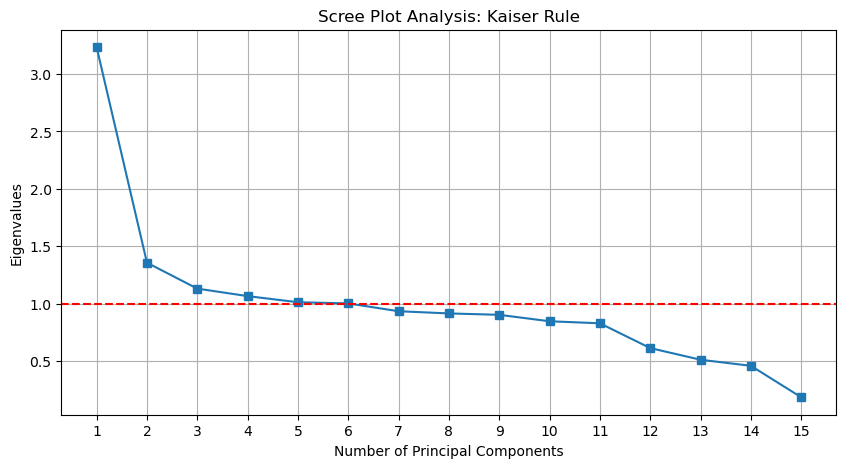



Eigenvalue Array
[3.23356586 1.35687976 1.13135077 1.066051   1.01267494 1.00246233
 0.93441445 0.91526809 0.90316045 0.84702412 0.82931247 0.61346435
 0.51193033 0.45908462 0.18549962]


In [13]:
#Plotting Kaiser Rule
plt.figure(figsize = [10,5])
plt.title('Scree Plot Analysis: Kaiser Rule')
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='s', linestyle='-')
plt.xticks(range(1, len(eigenvalues) +1))
plt.axhline(y=1.0, color='r', linestyle='--', label="1.0 Variance Threshold")  # Marks 1.0 variance line
plt.xlabel('Number of Principal Components')
plt.ylabel('Eigenvalues')
plt.grid()
plt.show()
##Kaiser Rule identifies 6 PCs to maintain

print("\n\nEigenvalue Array")
print(eigenvalues)
##Top 6 values are over 1.0 confirmed

In [14]:
#E3 - Identify the variance of each of the principal components identified in part E2
#E4 - Summarize the results of your PCA

#Creating a table for Principal Component breakdown
variance_df = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(eigenvalues))],
    "Eigenvalue": eigenvalues,
    "Explained Variance Ratio": explained_variance,
    "Cumulative Variance": cumulative_variance
})

display(variance_df.set_index("Principal Component"))

,Eigenvalue,Explained Variance Ratio,Cumulative Variance
Principal Component,,,
PC1,3.233566,0.215540,0.215540
PC2,1.356880,0.090446,0.305986
PC3,1.131351,0.075413,0.381399
PC4,1.066051,0.071060,0.452459
PC5,1.012675,0.067502,0.519961
PC6,1.002462,0.066821,0.586782
PC7,0.934414,0.062285,0.649067
PC8,0.915268,0.061009,0.710076
PC9,0.903160,0.060202,0.770278


In [15]:
#Selecting the top 8 values and preparing for Multiple Linear Regression
pca_final_values = principal_components[:, :8]
pca_final_df = pd.DataFrame(pca_final_values, columns=[f'PC{i+1}' for i in range(8)]) #Convert to DF
display(pca_final_df.describe()) #Confirming DF populated


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
count,7000.000000,7000.000000,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03
mean,0.000000,0.000000,-3.248195e-17,1.015061e-17,-1.827110e-17,2.588406e-17,1.218073e-17,3.045183e-18
std,1.798212,1.164852,1.063650e+00,1.032497e+00,1.006318e+00,1.001230e+00,9.666512e-01,9.566964e-01
min,-5.061368,-3.334616,-3.152703e+00,-3.495327e+00,-2.971960e+00,-2.459060e+00,-3.445826e+00,-3.183276e+00
25%,-1.289576,-0.840727,-7.543630e-01,-7.232384e-01,-6.990078e-01,-6.569039e-01,-6.689527e-01,-6.468180e-01
50%,-0.071973,-0.013946,-4.278736e-02,-3.211289e-02,-3.448977e-02,-1.004106e-01,-8.424973e-03,1.517953e-02
75%,1.245753,0.795492,7.155824e-01,6.958897e-01,6.631889e-01,5.097943e-01,6.410534e-01,6.602764e-01
max,6.549247,4.085575,4.000304e+00,4.157794e+00,4.925448e+00,5.298417e+00,3.614625e+00,3.464042e+00


In [16]:
''' Part 4: Multiple Linear Regression'''
#F1 - Split the data into two datasets, with a larger percentage assigned to the training dataset and a smaller percentage assigned to the test dataset. Provide the file(s). 
#Splitting the Dataset into Test and Training
y = df.price
X = pca_final_df

#Splitting the Dataset into a Test and Training dataset with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_frame() #Converting to dataframe for ease in exporting
y_test = y_test.to_frame()
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")
print(f"Training labels: {y_train.shape}, Testing labels: {y_test.shape}")

Training data: (5600, 8), Testing data: (1400, 8)
Training labels: (5600, 1), Testing labels: (1400, 1)


In [17]:
#Combining the datasets for exporting
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [18]:
#Exporting the Test & Train Datasets to share
train_data.to_csv("training_data", index=False)
test_data.to_csv("test_data", index=False)

In [19]:
#F2 - Use the training dataset to create and perform a regression model using regression as a statistical method. Provide the Regression Output Metrics.
#Creating Initial Multiple Regression Model
model = sm.OLS(y_train, X_train.assign(const=1))
results = model.fit()
print(results.summary())
##For PCA5-PCA8, the p-values are all above the .05 threshold

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     1238.
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        09:54:17   Log-Likelihood:                -71884.
No. Observations:                5600   AIC:                         1.438e+05
Df Residuals:                    5591   BIC:                         1.438e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1         6.232e+04    671.806     92.766      0.0

In [20]:
#Defining the Backwards Stepwise Elimination Loop
def backward_elimination(X, y, significance_level=0.05):
    X = X.assign(const=1)
    iteration = 1  #Track loop iterations
    while True:
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues
        print(f"\nIteration {iteration} - P-values:\n", p_values)#Print current iteration and p-values

        
        max_p_value = p_values.max() #To identify highest p-value
        if max_p_value > significance_level:
            worst_feature = p_values.idxmax()
            print(f"Removing {worst_feature} (p-value: {max_p_value:.4f})")
            if worst_feature in X.columns:
                X.drop(columns=[worst_feature], inplace=True) 
        else:
            break
        
        iteration += 1  #Increase iteration count

    print("\nFinal Model Summary:")
    return X, model.summary()

#Run the backward elimination
X_final, model_summary = backward_elimination(X_train, y_train)
print(model_summary)


Iteration 1 - P-values:
 PC1       0.000000e+00
PC2      2.813727e-112
PC3      1.489747e-149
PC4       1.000404e-05
PC5       1.452606e-01
PC6       6.279683e-01
PC7       2.443730e-01
PC8       1.142559e-01
const     0.000000e+00
dtype: float64
Removing PC6 (p-value: 0.6280)

Iteration 2 - P-values:
 PC1       0.000000e+00
PC2      2.960429e-112
PC3      1.479677e-149
PC4       1.005036e-05
PC5       1.458492e-01
PC7       2.460231e-01
PC8       1.133403e-01
const     0.000000e+00
dtype: float64
Removing PC7 (p-value: 0.2460)

Iteration 3 - P-values:
 PC1       0.000000e+00
PC2      3.994701e-112
PC3      1.652587e-149
PC4       1.005009e-05
PC5       1.475339e-01
PC8       1.095401e-01
const     0.000000e+00
dtype: float64
Removing PC5 (p-value: 0.1475)

Iteration 4 - P-values:
 PC1       0.000000e+00
PC2      3.810944e-112
PC3      1.392853e-149
PC4       9.963506e-06
PC8       1.108763e-01
const     0.000000e+00
dtype: float64
Removing PC8 (p-value: 0.1109)

Iteration 5 - P-value

In [21]:
#Re-testing the Model after dropping PC4
##After running the full model on the Test dataset, PC4 was identified as not statistically significant
X_train_reduced = X_train[["PC1", "PC2", "PC3"]].assign(const=1)
final_model_reduced = sm.OLS(y_train, X_train_reduced).fit()
print(final_model_reduced.summary())
##Dropping PC4 did not affect R² values in any meaningful way

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     3280.
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        09:54:17   Log-Likelihood:                -71896.
No. Observations:                5600   AIC:                         1.438e+05
Df Residuals:                    5596   BIC:                         1.438e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1         6.232e+04    673.004     92.595      0.0

In [22]:
#F3 - Give the mean squared error (MSE) of the optimized model used on the training set
final_model_reduced = sm.OLS(y_train, X_train_reduced).fit()
y_pred = final_model_reduced.predict(X_train_reduced)
mse_train = mean_squared_error(y_train, y_pred)
print ("Mean Squared Error (MSE) - Training Dataset:", mse_train)

Mean Squared Error (MSE) - Training Dataset: 8299174234.112436


In [23]:
#F4 - Run the prediction on the test dataset using the optimized regression model from part F2 to give the accuracy of the prediction model based on the mean squared error (MSE)
#Running Optimized Model on Test Dataset
X_test_reduced = X_test[["PC1", "PC2", "PC3"]].assign(const=1)
test_model = sm.OLS(y_test, X_test_reduced).fit()
print(test_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     756.7
Date:                Fri, 07 Feb 2025   Prob (F-statistic):          4.91e-292
Time:                        09:54:17   Log-Likelihood:                -17954.
No. Observations:                1400   AIC:                         3.592e+04
Df Residuals:                    1396   BIC:                         3.594e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1         6.137e+04   1372.095     44.726      0.0

In [24]:
#Calculating Mean Squared Error for the Test Dataset
model = sm.OLS(y_test, X_test_reduced.assign(const=1)).fit()
y_pred = test_model.predict(X_test_reduced)
mse_test = mean_squared_error(y_test, y_pred)
print ("Mean Squared Error (MSE) - Test Dataset:", mse_test)

Mean Squared Error (MSE) - Test Dataset: 8059401217.70743


In [25]:
#Comparing both MSE
print ("Mean Squared Error (MSE) - Training Dataset:", mse_train)
print ("Mean Squared Error (MSE) - Test Dataset:", mse_test)

Mean Squared Error (MSE) - Training Dataset: 8299174234.112436
Mean Squared Error (MSE) - Test Dataset: 8059401217.70743


In [26]:
#Validating results by calculating Root Mean Squared Error (RMSE)
training_rmse = np.sqrt(mse_train)
test_rmse = np.sqrt(mse_test)

print("Training RMSE:", training_rmse)
print("Test RMSE:", test_rmse)
print("Mean housing Price:", df["price"].mean())
##Test RMSE within 1,217 (1.4%) of Training RMSE

Training RMSE: 91099.80369963722
Test RMSE: 89774.1678753272
Mean housing Price: 307281.5217142857


In [27]:
#G3 - Verification of Assumptions of Multiple Linear Regression

#Creating Correlation Matrix to confirm no Multicollinearity
print("Correlation Matrix of Final Training Dataset:\n")
display(X_train_reduced.corr())
print("\nCorrelation Matrix of Final Test Dataset:\n")
display(X_test_reduced.corr())

print("\nShape of Training & Test Dataset:")
display(f'X_train Shape: {X_train_reduced.shape}')
display(f'y_train Shape: {y_train.shape}')
display(f'X_test Shape: {X_test_reduced.shape}')
display(f'y_test Shape: {y_test.shape}')

Correlation Matrix of Final Training Dataset:



,PC1,PC2,PC3,const
PC1,1.000000,0.002582,0.000433,NaN
PC2,0.002582,1.000000,0.004951,NaN
PC3,0.000433,0.004951,1.000000,NaN
const,NaN,NaN,NaN,NaN



Correlation Matrix of Final Test Dataset:



,PC1,PC2,PC3,const
PC1,1.000000,-0.010185,-0.001197,NaN
PC2,-0.010185,1.000000,-0.021698,NaN
PC3,-0.001197,-0.021698,1.000000,NaN
const,NaN,NaN,NaN,NaN



Shape of Training & Test Dataset:


'X_train Shape: (5600, 4)'

'y_train Shape: (5600, 1)'

'X_test Shape: (1400, 4)'

'y_test Shape: (1400, 1)'